In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
try:
    import simpleaudio as sa
except:
    %pip install simpleaudio
    import simpleaudio as sa
from IPython.display import Audio
import ipywidgets as widgets
from IPython.display import display

In [46]:
# calculate note frequencies
A_freq = 440
Csh_freq = A_freq * 2 ** (4 / 12)
E_freq = A_freq * 2 ** (7 / 12)

c = 255/np.log(255)

#R_val = 0
#G_val = 255
#B_val = 100

# get timesteps for each sample, T is note duration in seconds
sample_rate = 44100
T = 1
interval = int(sample_rate*T)
t = np.linspace(0, T, interval, False)

# generate sine wave notes
def generate_sound(rgb):
    sin_scal = t * 2 * np.pi
    amp_scal = 1/np.log(rgb[0] + rgb[1] + rgb[2])

    def generate_sins(R,G,B):
        R_1 = R*np.sin(A_freq   * sin_scal)
        G_1 = G*np.sin(Csh_freq * sin_scal)
        B_1 = B*np.sin(E_freq   * sin_scal)
        rv = R_1 + G_1 + B_1
        rv*= amp_scal
        return rv

    LOC_WHITE = generate_sins(255,255,255)

    out = generate_sins(rgb[0], rgb[1], rgb[2])
    
    # normalize to 16-bit range
    out*= 32767 / np.max(np.abs(LOC_WHITE))
    return out

def generate_sound_no_scal(R_val, G_val, B_val):
    sin_scal = t * 2 * np.pi

    def generate_sins(R,G,B):
        R_1 = R*np.sin(A_freq   * sin_scal)
        G_1 = G*np.sin(Csh_freq * sin_scal)
        B_1 = B*np.sin(E_freq   * sin_scal)
        return R_1 + G_1 + B_1
    
    LOC_WHITE = generate_sins(255,255,255)

    out = generate_sins(R_val, G_val, B_val)
    
    # normalize to 16-bit range
    out*= 32767 / np.max(np.abs(LOC_WHITE))
    return out

WHITE = generate_sound([255,255,255])
WHITE_NO_SCAL = generate_sound_no_scal(255,255,255)

# concatenate notes
#audio = np.hstack((A_note, Csh_note, E_note))
audio = np.hstack((generate_sound([10,87,172]), generate_sound([172,87,10])))

### BEGIN UNCOMMENT
# convert to 16-bit data
#audio = audio.astype(np.int16)

# start playback
#play_obj = sa.play_buffer(audio, 1, 2, sample_rate)

# wait for playback to finish before exiting
#play_obj.wait_done()
### END UNCOMMENT

Audio(data=audio, rate=sample_rate)

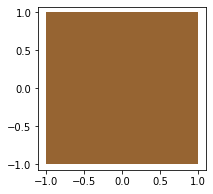

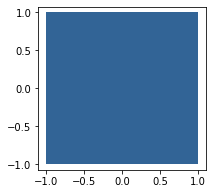

In [52]:
def plot_colored_square(rgb):
    for i in range(len(rgb)):
        rgb[i] = rgb[i]/255
    col = colors.to_hex(rgb)
    x,y = [-1,1,1,-1],[-1,-1,1,1]
    plt.figure(figsize=(3,3))
    plt.axis('equal')
    plt.fill(x, y, col)
    plt.show()

def generate_samples(color_list):
    for c in color_list:
        plot_colored_square(c)
        display(Audio(data = generate_sound(c), rate = sample_rate))
    
color_list = [[150,100,50], [50,100,150]]
generate_samples(color_list)



In [53]:
color = widgets.ColorPicker(
    concise=True,
    description='Pick a color',
    value='white',
    disabled=False
)
button = widgets.Button(
    value=False,
    description='Confirm',
    disabled=False,
    tooltip='Description',
    icon='check'
)

output = widgets.Output()

display(color, button, output)

def on_button_clicked(b):
    color.disabled = True
    button.disabled = True

button.on_click(on_button_clicked)

ColorPicker(value='white', concise=True, description='Pick a color')

Button(description='Confirm', icon='check', style=ButtonStyle(), tooltip='Description')

Output()

In [149]:
def hex_to_rgb(hex):
  rgb = []
  for i in (0, 2, 4):
    decimal = int(hex[i:i+2], 16)
    rgb.append(decimal)
  
  return rgb

hex_to_rgb(color.value[1:])

[100, 150, 50]

'Button widget.\n\n    This widget has an `on_click` method that allows you to listen for the\n    user clicking on the button.  The click event itself is stateless.\n\n    Parameters\n    ----------\n    description: str\n       description displayed next to the button\n    tooltip: str\n       tooltip caption of the toggle button\n    icon: str\n       font-awesome icon name\n    disabled: bool\n       whether user interaction is enabled\n    '